In [1]:
import os
import utils_general_porpose
import pandas as pd
import re
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
current_dir = os.getcwd()
print("Current directory:", current_dir)
data = utils_general_porpose.load_json(current_dir, "/concepts/clinical_concepts_20250404_171428.json")

Current directory: /home/pajaro/compu_Pipe_V3


In [3]:
df = pd.DataFrame(data)
#df.head()

In [4]:
def cleanReviews(documents):
    cleanedReviews = []
    for document in documents:
        #s = re.sub(r'[^a-zA-Z0-9\s]', '', document)
        #s = re.sub('\s+',' ', s)
        s = str(document).lower()
        tokens = [token for token in s.split(" ") if token != ""]
        tokens = [word for word in tokens if word not in ['enfermedad']]               
        review = ' '.join(tokens)
        cleanedReviews.append(review)
    return(cleanedReviews)

In [ ]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [6]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

In [7]:
def textTrends(documents):
    cleanedReviews = cleanReviews(documents)
    plotNgrams(cleanedReviews)

In [8]:
negApnea = df[df["label"] == 0]
print(negApnea.shape)
posApnea = df[df["label"] == 1]
print(posApnea.shape)

(192, 4)
(732, 4)


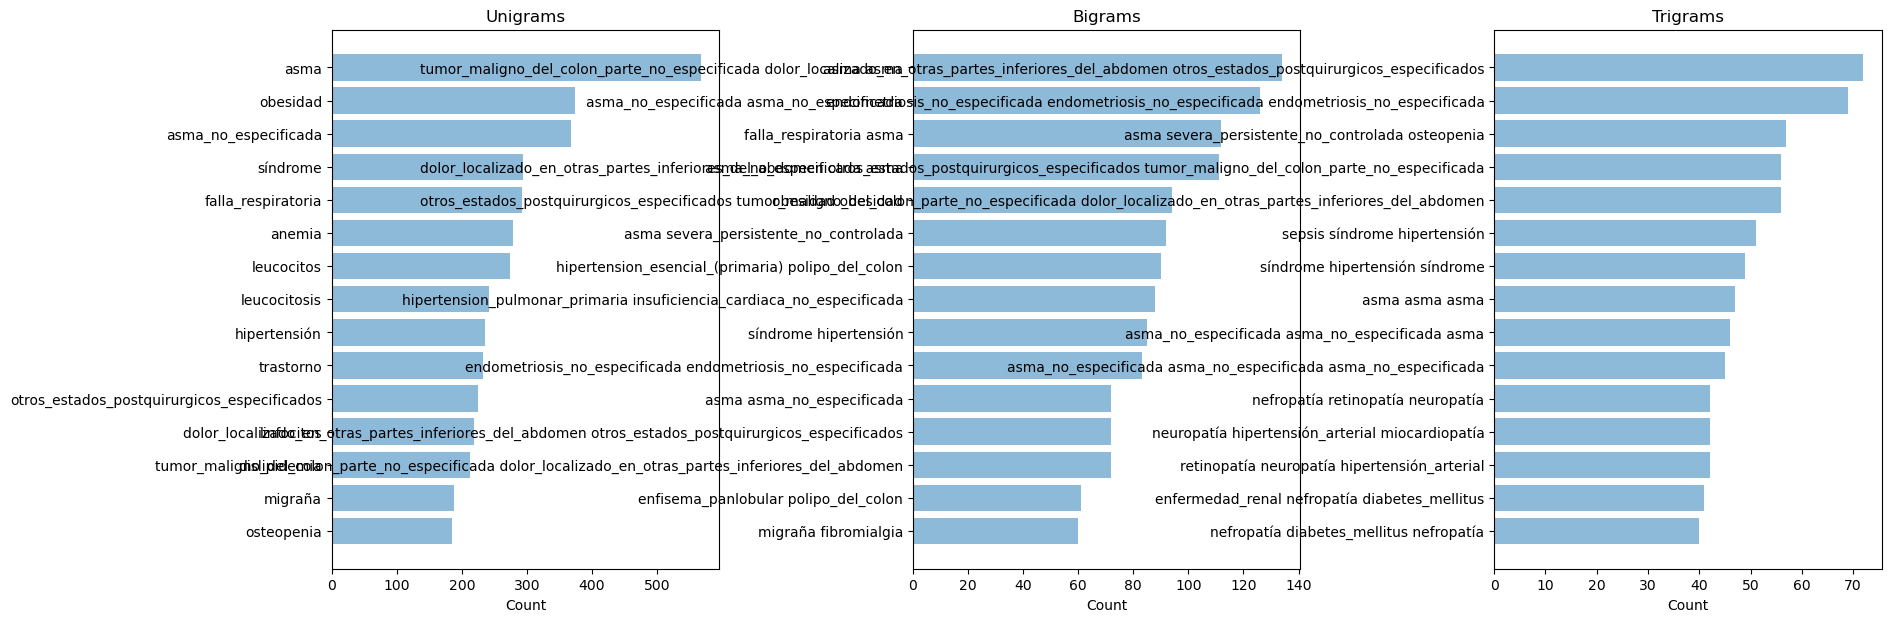

In [9]:
textTrends(negApnea["entities"])

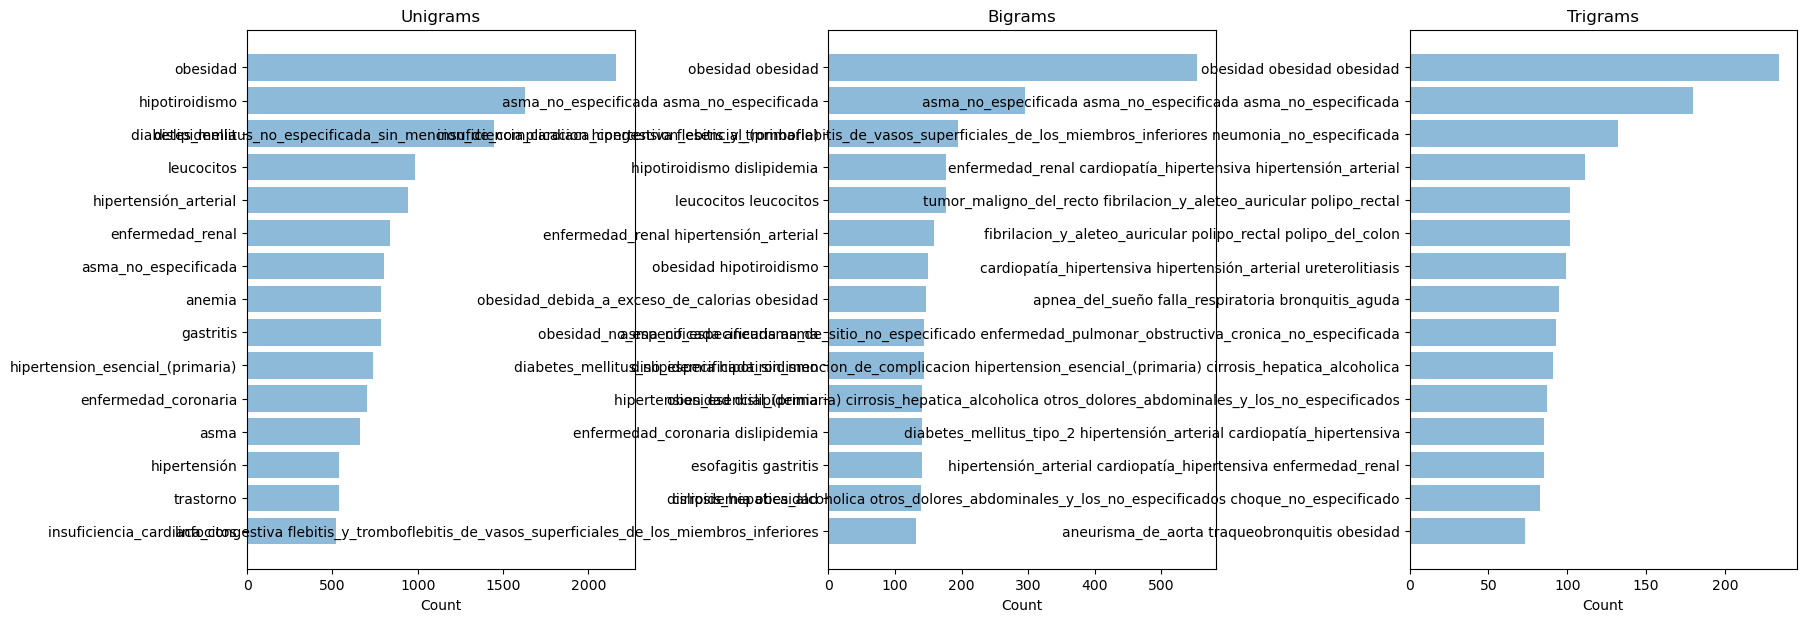

In [10]:
textTrends(posApnea["entities"])

In [29]:
from collections import Counter

def count_top_words(datasets, top_n=20, exclude_words=None):
    """
    Counts the frequency of words across a series of datasets and returns the top N most frequent words.

    Args:
        datasets (list): A list of strings, where each string represents a dataset.
        top_n (int): The number of top frequent words to return.
        exclude_words (set): A set of words to exclude from the count.

    Returns:
        list: A list of tuples with the top N most frequent words and their counts.
    """
    if exclude_words is None:
        exclude_words = set()

    word_counter = Counter()

    for dataset in datasets:
        # Split the dataset into words and normalize to lowercase
        words = dataset.lower().split()
        # Filter out excluded words
        filtered_words = [word for word in words if word not in exclude_words]
        # Update the word counter with the current dataset
        word_counter.update(filtered_words)

    return word_counter.most_common(top_n)

In [30]:
#df.info()
# Count the top 20 words in the "entities" column
#excluder_words = set(stopwords.words('spanish'))
excluder_words = {"enfermedad", "paciente"}
top_words = count_top_words(df["entities"], top_n=20, exclude_words=excluder_words)
print("Top 20 words in the 'entities' column:")
for word, count in top_words:
    print(f"{word}: {count}")
"""
# Create a bar chart for the top 20 words
words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 20 Words in Entities Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
"""

Top 20 words in the 'entities' column:
obesidad: 2536
hipotiroidismo: 1775
dislipidemia: 1661
leucocitos: 1258
asma: 1227
asma_no_especificada: 1168
hipertensión_arterial: 1095
anemia: 1062
enfermedad_renal: 978
hipertension_esencial_(primaria): 917
gastritis: 885
hipertensión: 774
trastorno: 769
enfermedad_coronaria: 752
linfocitos: 738
leucocitosis: 733
síndrome: 663
falla_respiratoria: 650
diabetes_mellitus: 598
otros_estados_postquirurgicos_especificados: 541


"\n# Create a bar chart for the top 20 words\nwords, counts = zip(*top_words)\nplt.figure(figsize=(10, 6))\nplt.bar(words, counts)\nplt.xlabel('Words')\nplt.ylabel('Counts')\nplt.title('Top 20 Words in Entities Column')\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n"

In [31]:
excluder_words = {"enfermedad", "paciente"}
top_words = count_top_words(posApnea["entities"], top_n=20, exclude_words=excluder_words)
print("Top 20 clinical concepts in patients with apena:")
for word, count in top_words:
    print(f"{word}: {count}")

Top 20 clinical concepts in patients with apena:
obesidad: 2162
hipotiroidismo: 1628
dislipidemia: 1448
leucocitos: 984
hipertensión_arterial: 942
enfermedad_renal: 836
asma_no_especificada: 801
anemia: 783
gastritis: 782
hipertension_esencial_(primaria): 740
enfermedad_coronaria: 705
asma: 660
hipertensión: 538
trastorno: 536
linfocitos: 520
diabetes_mellitus: 498
leucocitosis: 491
hematuria: 472
diabetes_mellitus_tipo_2: 441
hernia_hiatal: 434


In [32]:
excluder_words = {"enfermedad", "paciente"}
top_words = count_top_words(negApnea["entities"], top_n=20, exclude_words=excluder_words)
print("Top 20 clinical concepts in patients without apnea:")
for word, count in top_words:
    print(f"{word}: {count}")

Top 20 clinical concepts in patients without apnea:
asma: 567
obesidad: 374
asma_no_especificada: 367
síndrome: 294
falla_respiratoria: 293
anemia: 279
leucocitos: 274
leucocitosis: 242
hipertensión: 236
trastorno: 233
otros_estados_postquirurgicos_especificados: 225
linfocitos: 218
dislipidemia: 213
migraña: 188
osteopenia: 185
hipertension_esencial_(primaria): 177
sepsis: 164
polipo_del_colon: 155
hipertensión_arterial: 153
broncoespasmo: 148


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  924 non-null    int64  
 1   label       924 non-null    float64
 2   entities    924 non-null    object 
 3   codes       924 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 29.0+ KB


In [39]:
bigrams = documentNgrams(df["entities"], 2)
print(type(bigrams))

<class 'pandas.core.frame.DataFrame'>


In [40]:
bigrams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24202 entries, 293 to 688
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   24202 non-null  object
 1   count   24202 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 567.2+ KB


In [41]:
bigrams.head()

,words,count
293,artritis_no_especificada artritis_no_especificada,1
23302,eritema queratoconjuntivitis,1
23304,enfermedad queratoconjuntivitis,1
23307,queratoconjuntivitis pediculosis,1
23308,pediculosis esquizofrenia_paranoide,1


In [42]:
print(bigrams.sort_values(by='count', ascending=False))

                                                   words  count
688                                    obesidad obesidad    634
1415           asma_no_especificada asma_no_especificada    421
225                                enfermedad enfermedad    374
1428                           asma_no_especificada asma    240
1489                                           asma asma    205
...                                                  ...    ...
16682                     dermatitis_de_contacto eritema      1
19042                hipertensión_arterial atrofia_renal      1
16599                               zona hiperqueratosis      1
19007         tumor_maligno_de_la_prostata dislipidemias      1
16668  enfermedad otras_infecciones_bacterianas_de_si...      1

[24202 rows x 2 columns]
